In [180]:
from sympy import *

In [181]:
from sympy.physics.mechanics import *

In [79]:
q1, q2 = symbols('q1, q2')

# Two mass Pendulum Lagrange

source : https://www.youtube.com/watch?v=zhk9xLjrmi4&t=58s

coordinates need to be: complete, independent and holonomic!



LHS:
1. Determine the number of degrees of freedom that you need and choose the coordinantes
2. verify: complete, independent and holonomic!
3. compute T and V for every rigid body in the system 
4. compute 1,2,3 for every qi

RHS
1. For each qj we need to find the generalized Force that goes with it
2. compute the virtual work delta w(NC) assosiated with the virtual displacement delta qj. dwj = qj * delta j

# Falling mass
as described here: https://www.youtube.com/watch?v=4uJaKJASKnY

In [115]:
x1 = dynamicsymbols('x1')
m, g = symbols('m g')

In [116]:
x1

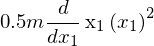

In [117]:
KE = 1/2 * m * (Derivative(x1))**2
KE

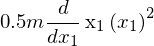

In [118]:
KE

In [119]:
PE = m*g*x1
PE

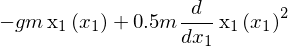

In [120]:
L = KE - PE
L

In [146]:
term1 = Derivative(L, x1).doit()

In [155]:
term2 = Derivative(L, x1_dot).doit()

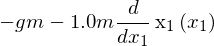

In [156]:
term1 - term2

## Spring 

In [157]:
k = symbols('k')

## Free Fall Example with Lagrange

In [183]:
q3, q4 = dynamicsymbols('q3 q4')
q3d, q4d = dynamicsymbols('q3 q4', 1)

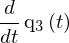

In [184]:
q3d

## Sympys Lagrangian Methods
http://docs.sympy.org/latest/modules/physics/mechanics/lagrange.html

In [186]:
KE = 1/2 * m * q3d **2

In [187]:
PE = m*g* q3

In [204]:
L = KE - PE

In [207]:
LM = LagrangesMethod(L, [q3, q3d])

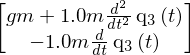

In [208]:
LM.form_lagranges_equations()

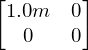

In [209]:
LM.mass_matrix

In [198]:
LM.forcing

$e^{i\pi} + 1 = 0$


$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$


$$\delta$$

$$ \sqrt[n]{ab} $$

$$
\begin{bmatrix}
a_1 & a_2 & a_3 & a_4 \\
b_1 & b_2 & b_3 & b_4 \\
c_1 & c_2 & c_3 & c_4 \\
d_1 & d_2 & d_3 & d_4
\end{bmatrix}
$$

In [ ]:
c

###  2DOF Pendulum

In [211]:
x1, y1, x2, y2 = dynamicsymbols('x1,y1, x1, y1')

In [212]:
x1d, y1d, x2d, y2d = dynamicsymbols('x1, y1, x2, y2', 1)

In [213]:
l1, l2 = symbols('l1, l2')

In [274]:
q11, q21 = dynamicsymbols('q11, q21')

In [290]:
x1 = l1 * sin(q11)
y1 = - l1 * cos(q11)

In [291]:
t = symbols('t')

In [300]:
x2 = l1 * sin(q11) + l2 * sin(q21)
y2 = - l1 * cos(q21) - l2 * cos(q21)

In [301]:
x1.diff(q11).doit()

In [302]:
mechanics_printing()

In [308]:
x1d = simplify(diff(x1, Symbol('t')).doit())
x1d

In [309]:
y1d = Derivative(y1, Symbol('t')).doit()
y1d

In [310]:
x2d = simplify(Derivative(x2, Symbol('t')).doit())
x2d

In [311]:
y2d = Derivative(y2, Symbol('t')).doit()
y2d

all potential energies are  $$V =\sum m*g*y$$

In [323]:
m1, m2 = symbols('m1, m2')
g = symbols('g')

In [329]:
v1 = (m1+m2) * g * y1
v2 = m2 * g * y2

In [330]:
v1

In [336]:
simplify(v2)

In [334]:
V_ges = v1 + v2
V_ges

 all kinetic energies T are $$ T = \sum \frac{1}{2} * m1 * \dot{x1}^{2} + \frac{1}{2} * m2 * \dot{x2}^{2}$$

In [347]:
T = 1/2 * m1 * (x1d **2 + y1d**2) + 1/2 * m2 * (x2d **2 + y2d**2)

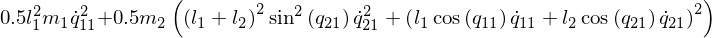

In [348]:
simplify(T)

In [349]:
L = T - V_ges

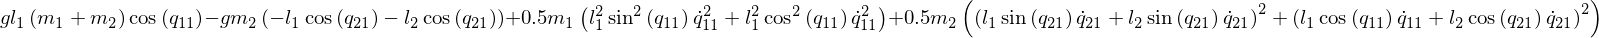

In [350]:
L

In [363]:
lq1d = Derivative(L, Derivative(q11, Symbol('t')))

In [364]:
simplify(lq1d)

In [367]:
lq1 = Derivative(L, q11)

In [368]:
lq1

In [389]:
Eq(lq1d-lq1, 0)

In [390]:
lq2d = Derivative(L, Derivative(q21, Symbol('t')))
lq2 = Derivative(L, q21)

In [392]:
Eq(lq2d - lq1, 0)

In [412]:
#constraint
constraints = Matrix([[x1 **2 + y1 **2 - l1], [x2 **2 + y2 **2 - l2]])

In [413]:
LM = LagrangesMethod(L, [q11, q21], hol_coneqs=constraints)

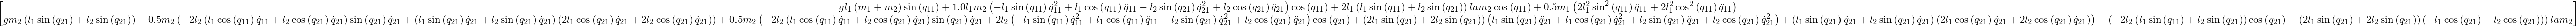

In [414]:
LM.form_lagranges_equations()

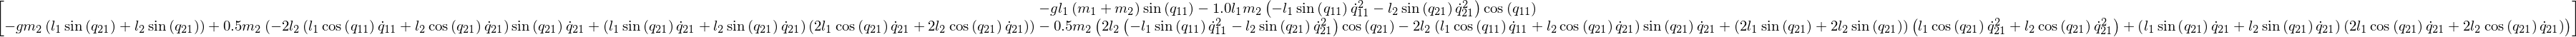

In [401]:
LM.forcing

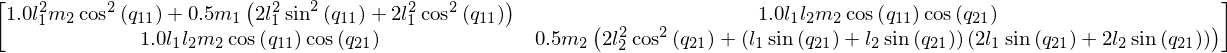

In [398]:
LM.mass_matrix

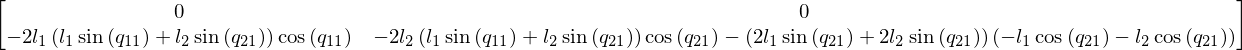

In [420]:
LM.lam_coeffs